In [11]:
import hddm
import pandas as pd
import matplotlib.pyplot as plt
import os
path = '/Users/Krista/Documents/github_repositories/testing-master/'

In [12]:
os.chdir(path)
os.getcwd()

'/Users/Krista/Documents/github_repositories/testing-master'

In [13]:
data = hddm.load_csv('./600t.csv')
data.columns = data.columns.str.strip()
data.head(4)
data.tail()

,rt,response,gen_drift,gen_bound,subj_idx,cond
119995,0.592,1,0.592298,0.623583,49,hv
119996,0.182,0,1.000000,0.920184,49,hv
119997,0.182,1,1.000000,1.374158,49,hv
119998,0.182,1,1.000000,0.796585,49,hv
119999,0.582,1,0.096764,0.614307,49,hv


In [14]:
data[data.cond == "lc"].gen_drift.mean(), data[data.cond == "hc"].gen_drift.mean()

(0.89228329554279695, 0.83792802669096045)

In [26]:
data[data.cond == "lv"].gen_drift.mean(), data[data.cond == "hv"].gen_drift.mean()

(0.88420933092313447, 0.82521664764371483)

In [27]:
data[data.cond == "lc"].gen_bound.mean(), data[data.cond == "hc"].gen_bound.mean()

(0.703605255727068, 0.74438252012186368)

In [15]:
data[data.cond == "lv"].gen_bound.mean(), data[data.cond == "hv"].gen_bound.mean()

(0.67313433381237486, 0.86644483586205268)

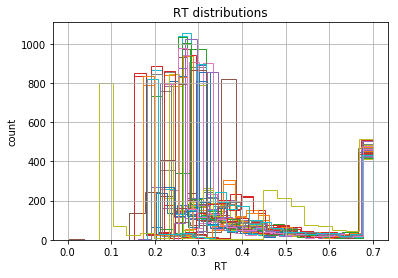

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)


In [17]:
comb_stim = hddm.HDDM(data, bias=False, depends_on={'v':'cond', 'a':'cond'},
                        include=['v'], p_outlier=0.05)
comb_stim.find_starting_values()
comb_stim.sample(1000, burn=20)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 859.0 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [18]:
drift_stim = hddm.HDDM(data, bias=False, depends_on={'v':'cond'},
                        include=['v'], p_outlier=0.05)
drift_stim.find_starting_values()
drift_stim.sample(1000, burn=20)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 730.7 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [19]:
bound_stim = hddm.HDDM(data, bias=False, depends_on={'a':'cond'},
                        include=['a'], p_outlier=0.05)
bound_stim.find_starting_values()
bound_stim.sample(1000, burn=20)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 645.9 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [10]:
stats = m_stim.gen_stats()
stats[stats.index.isin(['v(hc)','v(lc)', 'v(hv)','v(lv)'])]

NameError: name 'm_stim' is not defined

In [ ]:
stats[stats.index.isin(['a(hc)','a(lc)', 'a(hv)','a(lv)'])]

In [ ]:
m_stim.plot_posteriors('a', 'v')

In [ ]:
v_lc, v_hc = m_stim.nodes_db.node[['v(lc)', 'v(hc)']]
v_lv, v_hv = m_stim.nodes_db.node[['v(lv)', 'v(hv)']]
a_lv, a_hv = m_stim.nodes_db.node[['a(lv)', 'a(hv)']]
a_lc, a_hc = m_stim.nodes_db.node[['a(lc)', 'a(hc)']]

In [ ]:
hddm.analyze.plot_posterior_nodes([v_lc, v_hc])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('600t: Posterior of drift-rate group means')
plt.savefig('600t_drift_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv, v_hv])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('600t: Posterior of drift-rate group means')
plt.savefig('600t_drift_vol.pdf')

hddm.analyze.plot_posterior_nodes([a_lc, a_hc])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('600t: Posterior of decision boundary group means')
plt.savefig('600t_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([a_lv, a_hv])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('600t: Posterior of decision boundary group means')
plt.savefig('600t_bound_vol.pdf')



In [ ]:
# print("P(low_conflict_drift > high_conflict_drift) = ", (v_hc.trace() > v_lc.trace()).mean())
# print("P(low_conflict_bound > high_conflict_bound) = ", (a_hc.trace() > a_lc.trace()).mean())
# print("P(high_volatility_bound > low_volatility_bound) = ", (a_hv.trace() > a_lv.trace()).mean())
# print("P(high_volatility_drift > low_volatility_drift) = ", (v_hv.trace() > v_lv.trace()).mean())

In [ ]:
#for when i fit a null model 
# print "Lumped model DIC: %f" % model.dic
# print("Stimulus model DIC: %f" % m_stim.dic)

In [ ]:
#model does not save... db is 'ram' error
# m_stim.save('1000t')

combined model DIC: 15168.314338
drift model DIC: 20825.441982
bound model DIC: 16604.963031


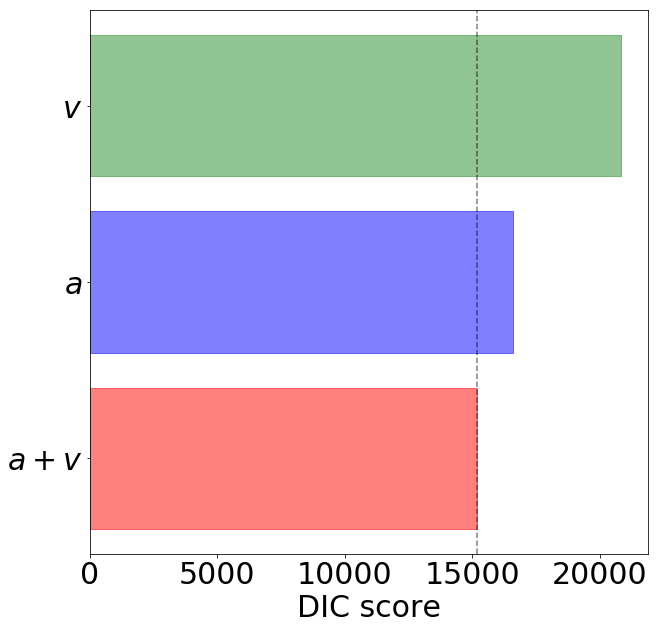

In [23]:
#for when i fit alternative models

fig_path = '/Users/Krista/Dropbox/volatileValues/m_plots/'

print("combined model DIC: %f" % comb_stim.dic)
print("drift model DIC: %f" % drift_stim.dic)
print("bound model DIC: %f" % bound_stim.dic)

plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

names = [r'$a + v$',r'$a$',r'$v$']
dics = [comb_stim.dic,  bound_stim.dic, drift_stim.dic]
bars = plt.barh(names,dics, alpha=0.5)
plt.xlabel('DIC score')

bars[0].set_color('r')
bars[1].set_color('blue')
bars[2].set_color('forestgreen')

plt.axvline(comb_stim.dic, color='k', alpha=0.5, linestyle = '--')
plt.savefig(fig_path+'600t_DIC.pdf')

In [25]:
import numpy as np
dics = np.hstack(np.matrix((comb_stim.dic,  bound_stim.dic,  drift_stim.dic)))
# np.diff(dics)
header = ('combined_dic, a_dic, v_dic')
np.savetxt('600t_DICs.csv', dics, header = header, delimiter=',', comments='')

In [24]:
 comb_stim.print_stats('./600t_comb_stats.csv')
 drift_stim.print_stats('./600t_drift_stats.csv')
 bound_stim.print_stats('./600t_bound_stats.csv')

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [ ]:
np.diff(dics)

In [ ]:
dics